# Basic demonstration of IteratedModel wrapper for a tree booster

In [1]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using MLJ
using MLJIteration
using Dates

using Plots
pyplot(size = (600, 300*(sqrt(5) - 1)))

using Statistics
using Random
Random.seed!(123)

MLJ.color_off()

X, y = make_moons(1000, rng=123)

 Activating environment at `~/Dropbox/Julia7/MLJ/MLJIteration/examples/tree_booster/Project.toml`


(Tables.MatrixTable{Array{Float64,2}}: (x1 = [1.7206683811604806, 0.14821409034766383, 0.1170300525558137, -0.2658871639511063, -0.04204121716927336, 0.1838304757474287, -0.8691616537970394, 0.2642002412146892, 1.3416653750098548, -0.3046938400851795  …  0.8637612446936085, 0.4085934106573695, -0.2660299827453575, 1.9792015236015081, 1.6435689280819394, 0.057309800850420395, 0.44972559762010555, 0.8626247135267562, -0.7083154203294516, 1.0324746310829092], x2 = [-0.39420477622244365, -0.5802326415085907, -0.44347076262447455, 0.9737663667857189, 0.302323156045299, -0.2831736892631012, 0.8210178612989905, 0.9057936974874823, -0.4955577346044079, 1.2469383876324687  …  -0.09862972572599901, 0.7975725761675077, 0.8329020942792849, -0.09880007678430468, -0.3854259928963418, 0.7936336282410702, 0.9299255616667429, -0.7234906064432653, 0.8461524140493903, -0.6721857606488766]), CategoricalArrays.CategoricalValue{Int64,UInt32}[1, 1, 1, 0, 1, 1, 0, 0, 1, 0  …  0, 0, 0, 1, 1, 0, 0, 1, 0, 1])

Import an model type:

┌ Info: Training Machine{ProbabilisticIteratedModel{EvoTreeClassifier{Float32,…}},…} @469.
└ @ MLJBase /Users/anthony/Dropbox/Julia7/MLJ/MLJBase/src/machines.jl:342
┌ Info: Stop triggered by TimeLimit(Millisecond(30000)) stopping criterion. 
└ @ IterationControl /Users/anthony/Dropbox/Julia7/MLJ/IterationControl/src/stopping_controls.jl:75
┌ Info: Total of 98 iterations. 
└ @ MLJIteration /Users/anthony/Dropbox/Julia7/MLJ/MLJIteration/src/core.jl:35


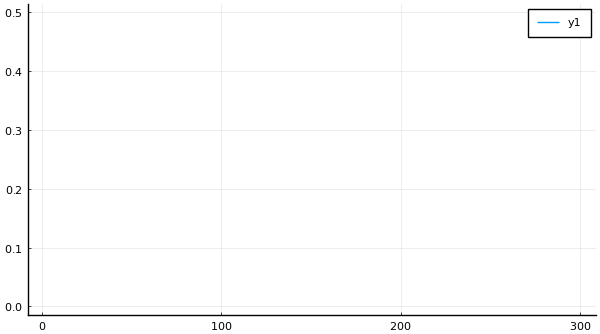

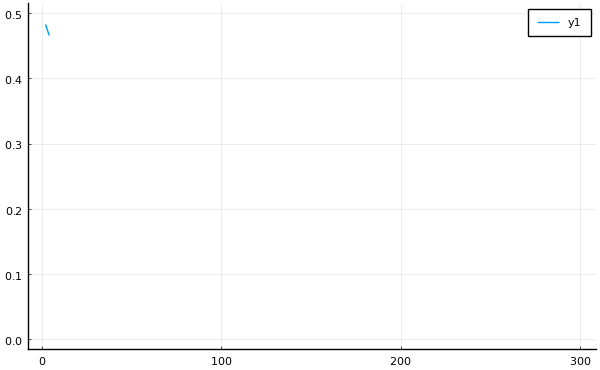

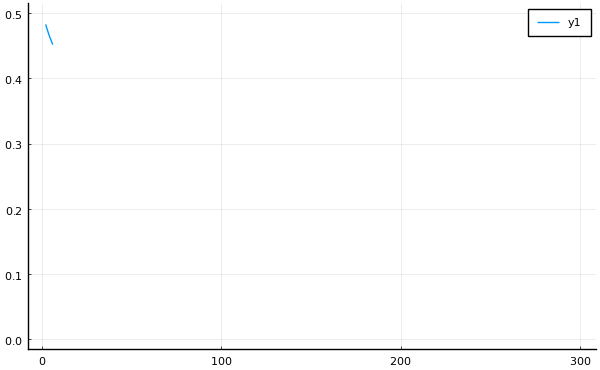

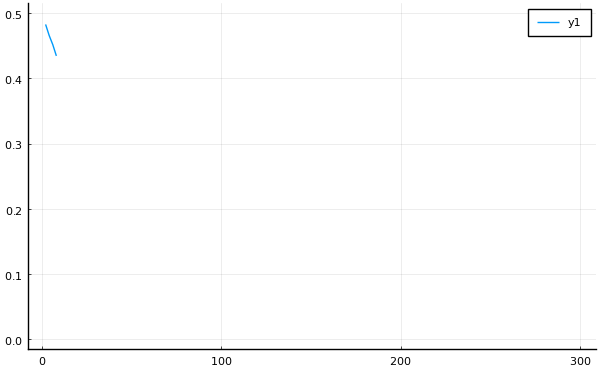

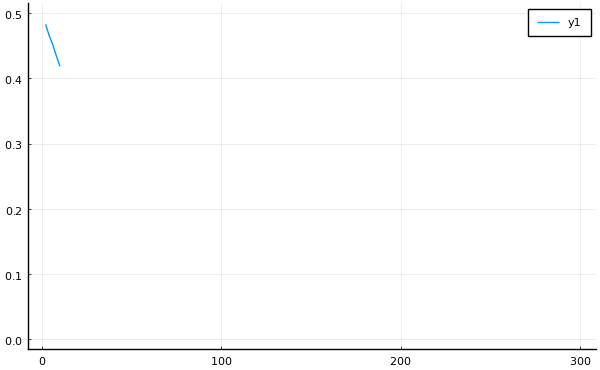

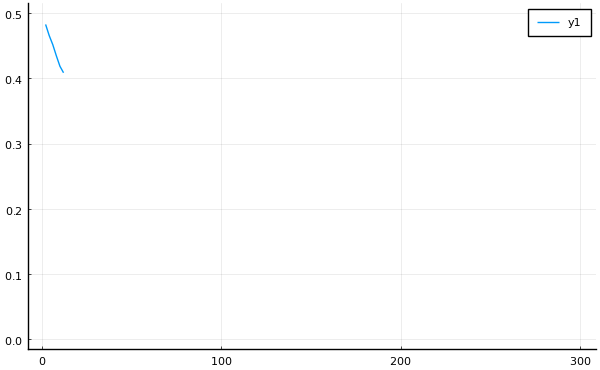

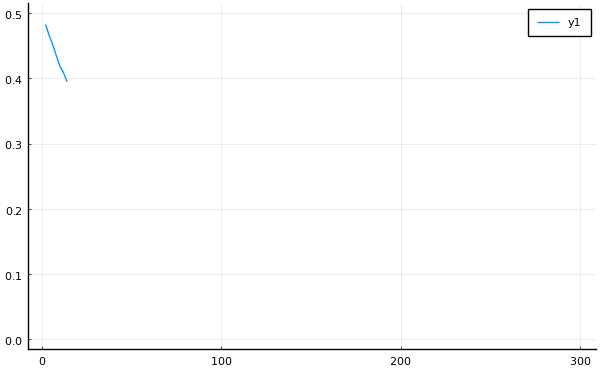

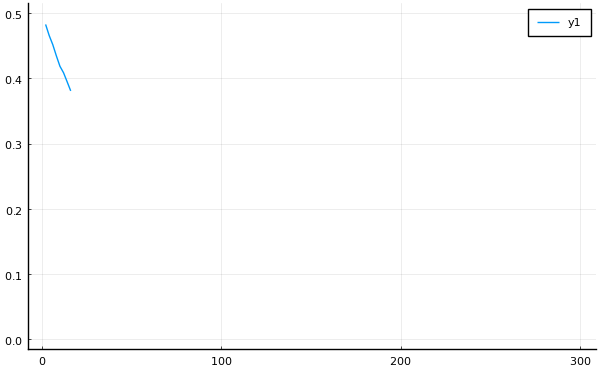

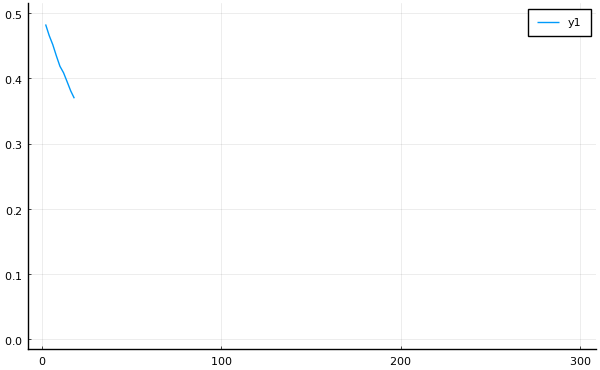

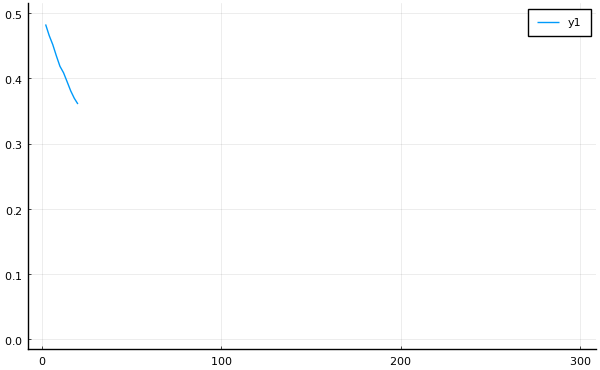

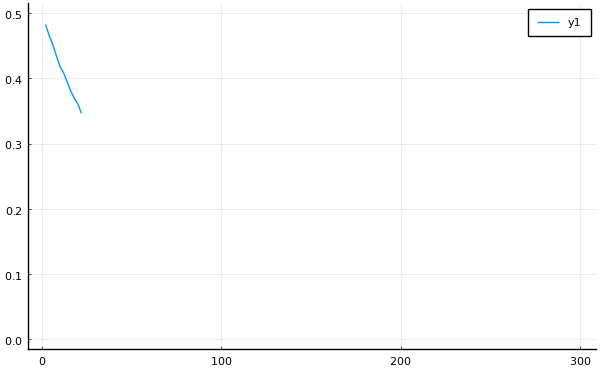

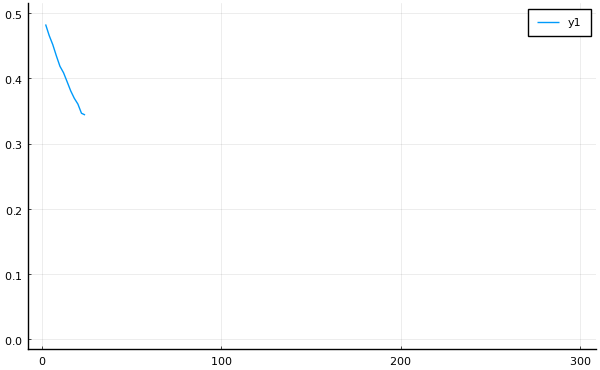

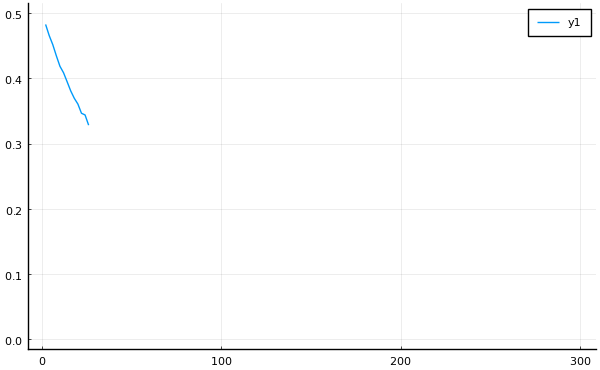

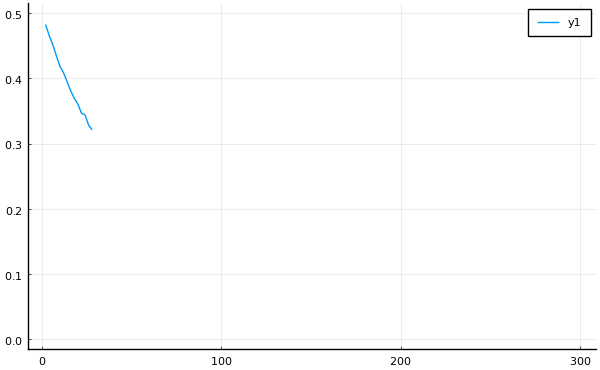

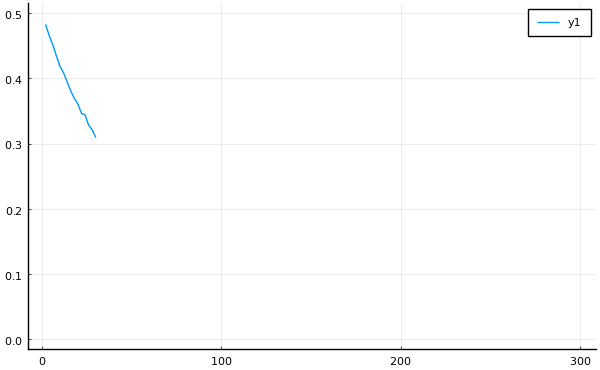

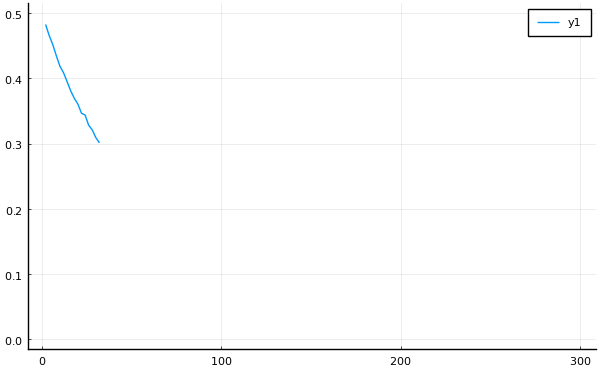

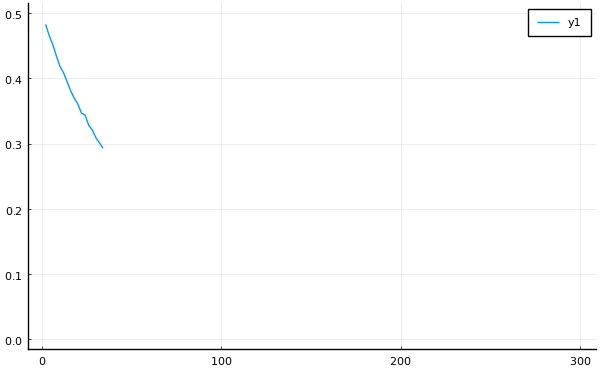

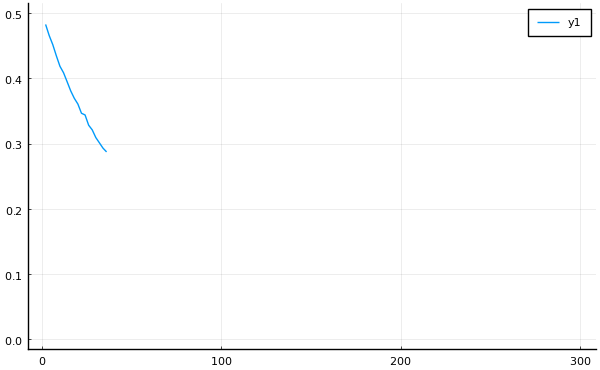

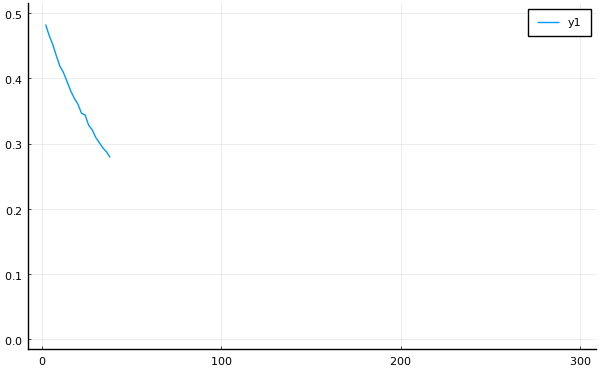

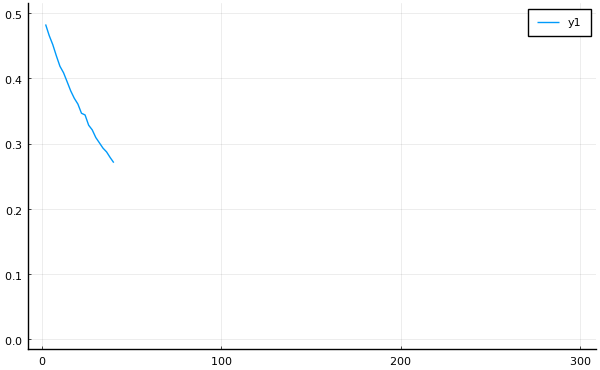

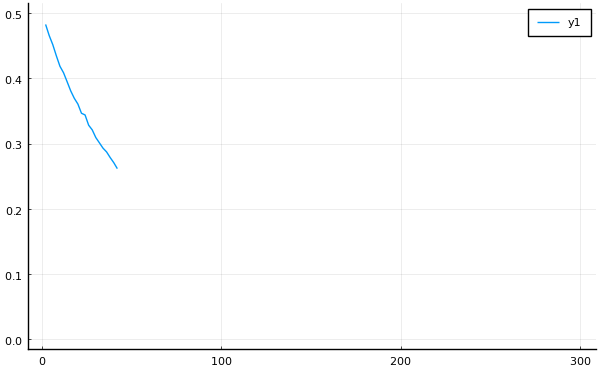

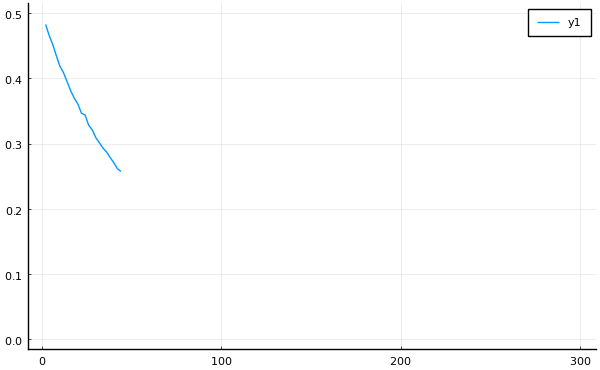

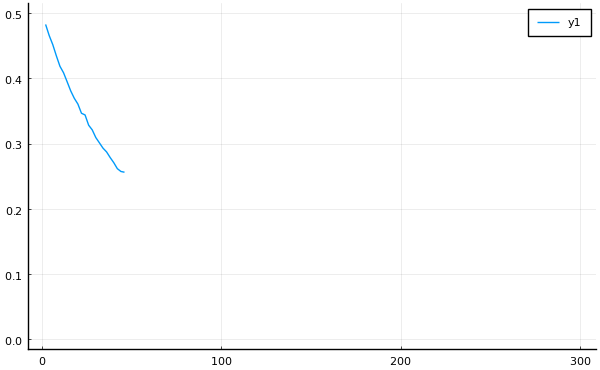

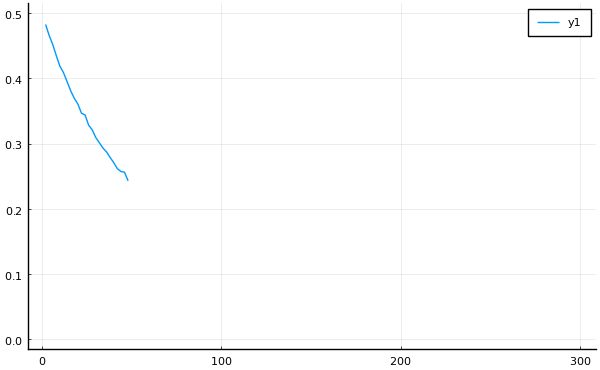

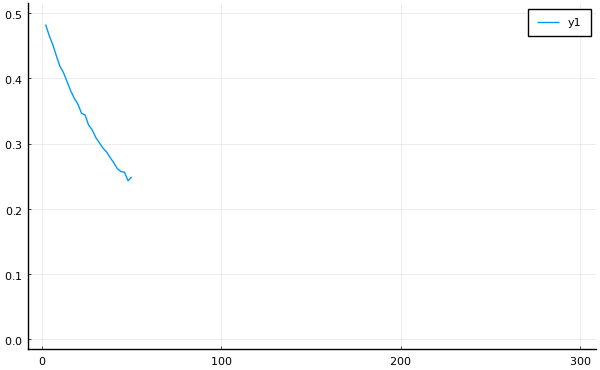

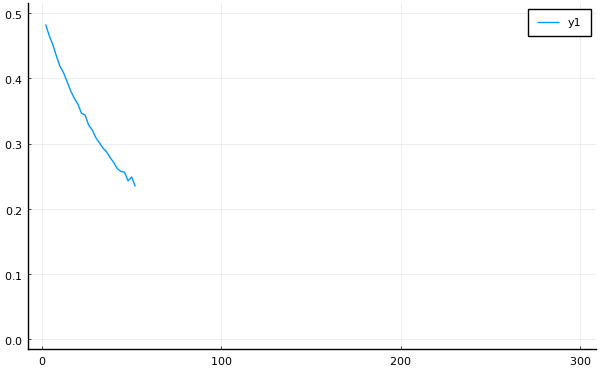

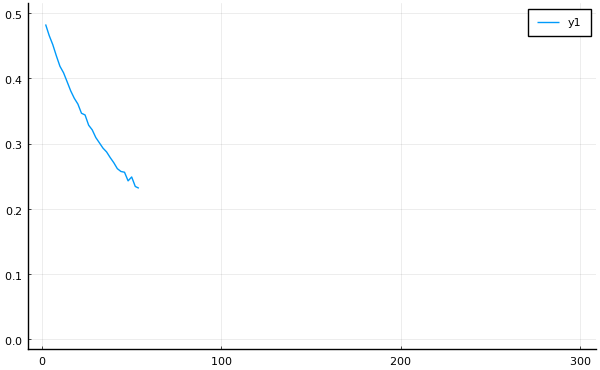

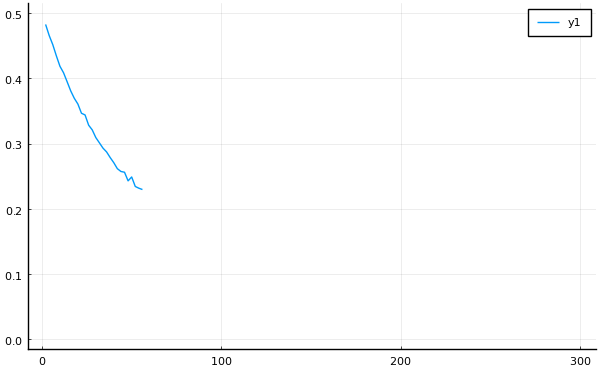

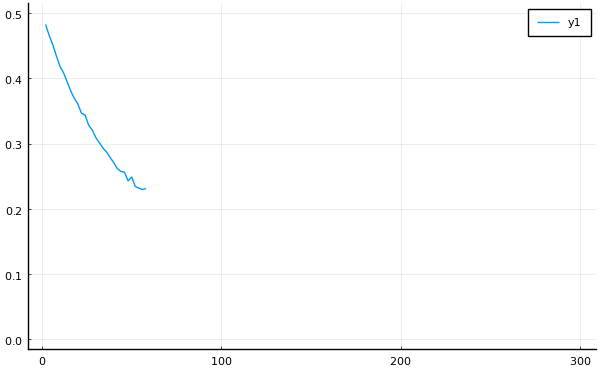

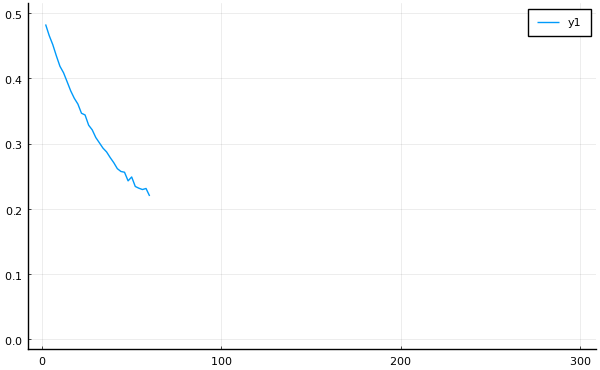

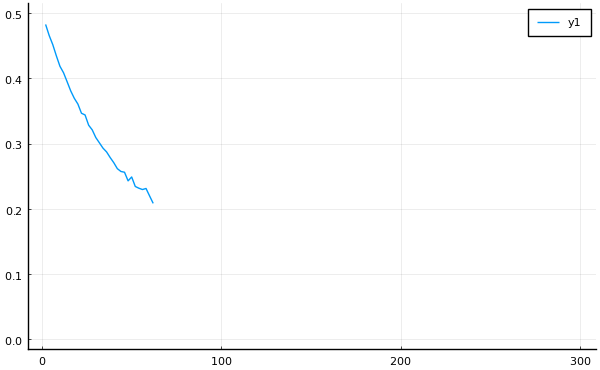

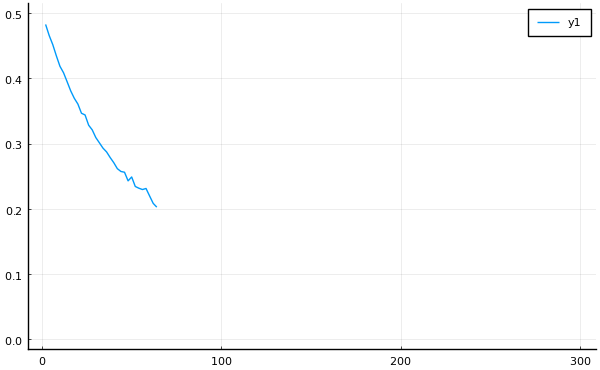

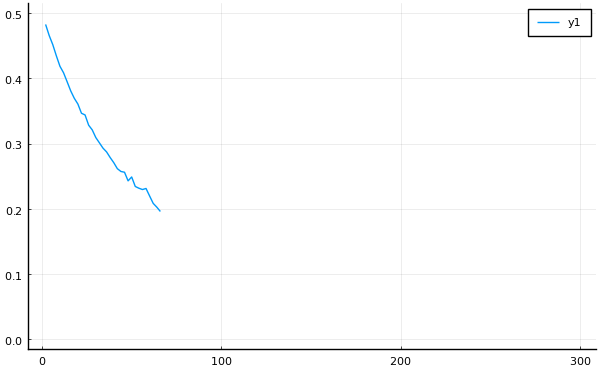

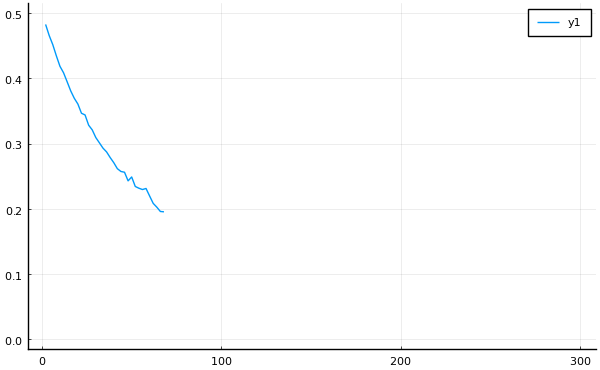

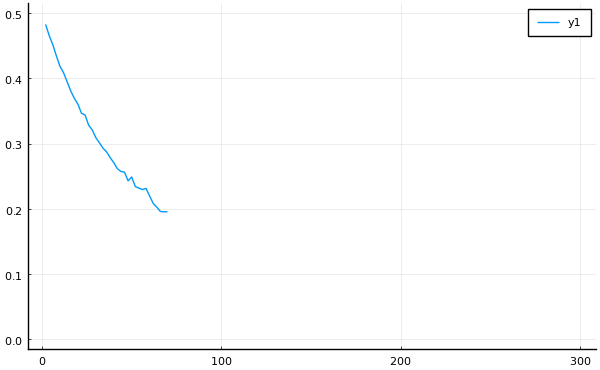

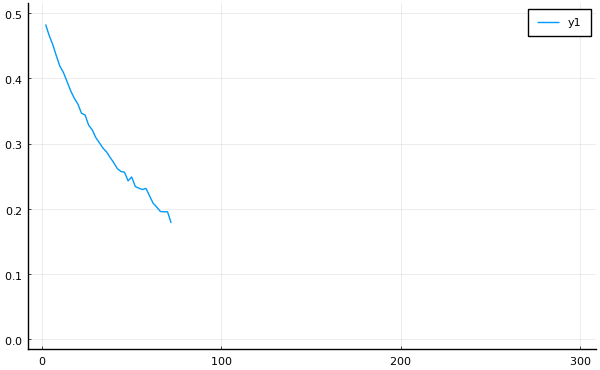

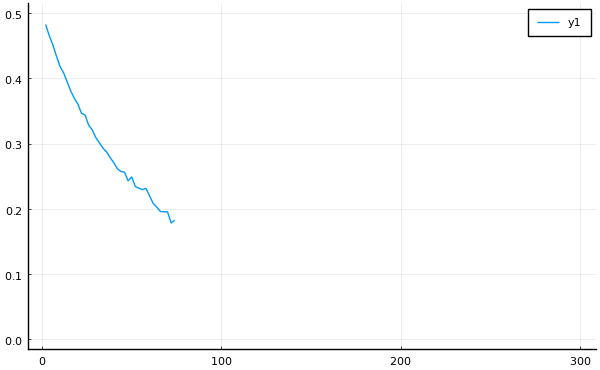

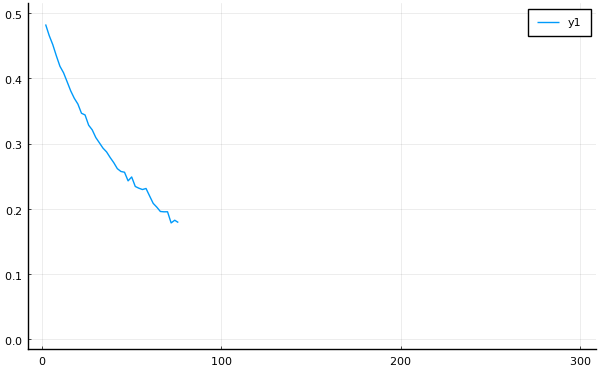

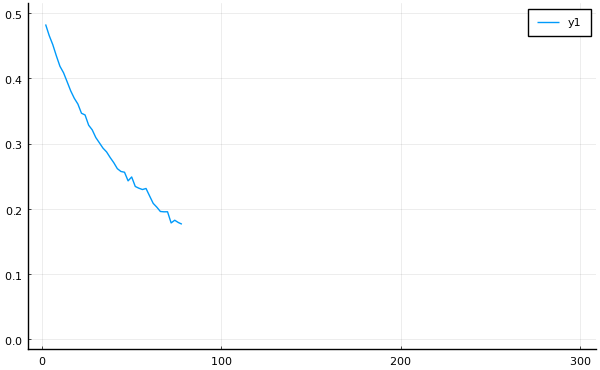

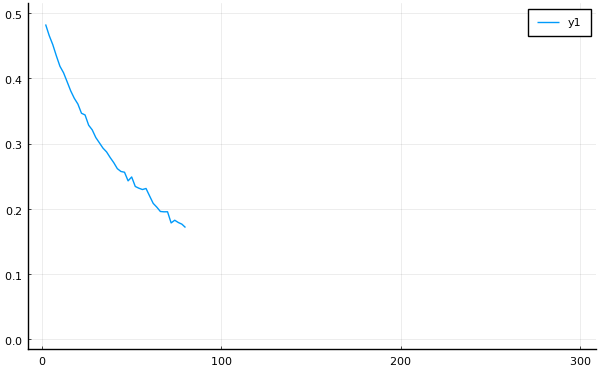

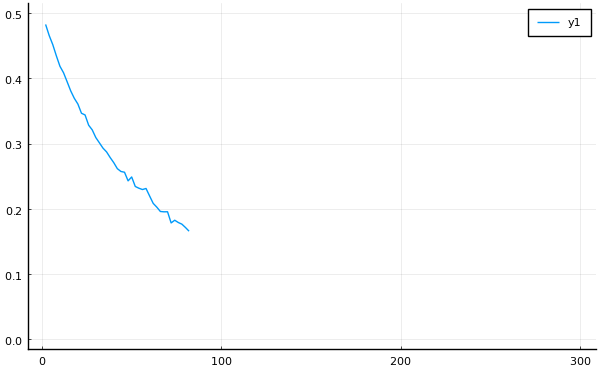

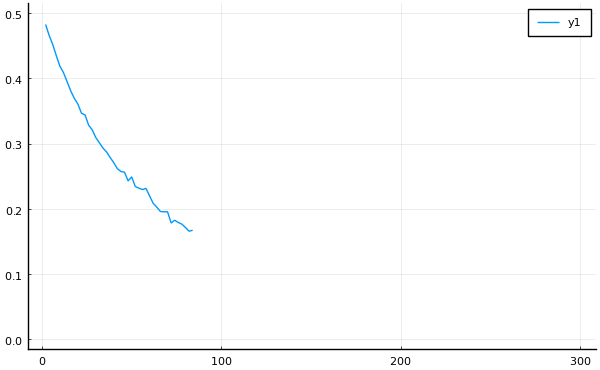

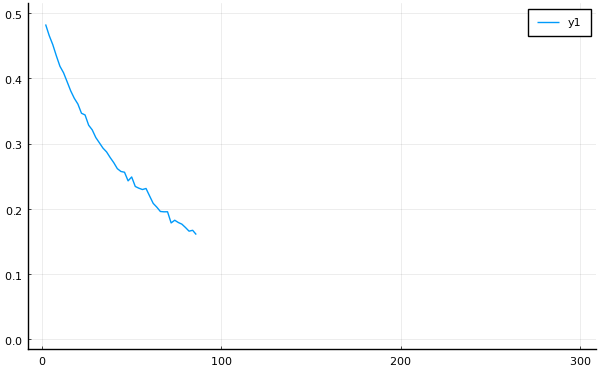

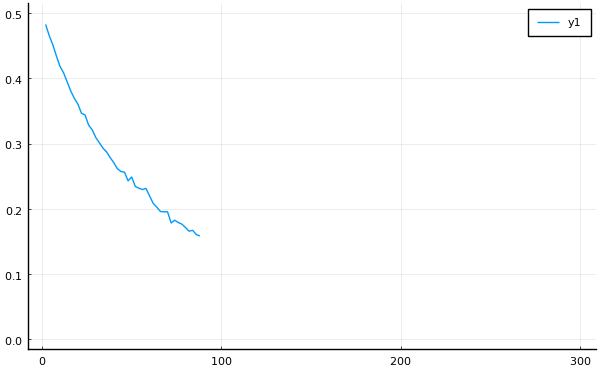

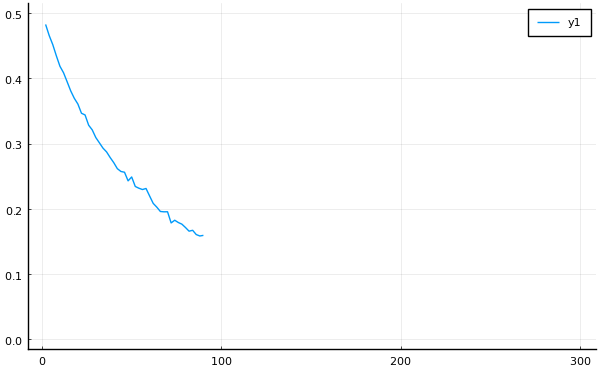

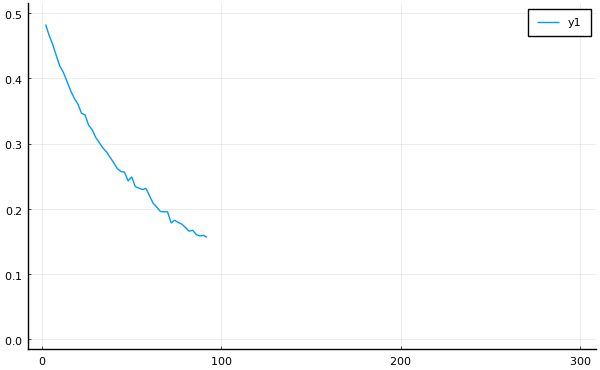

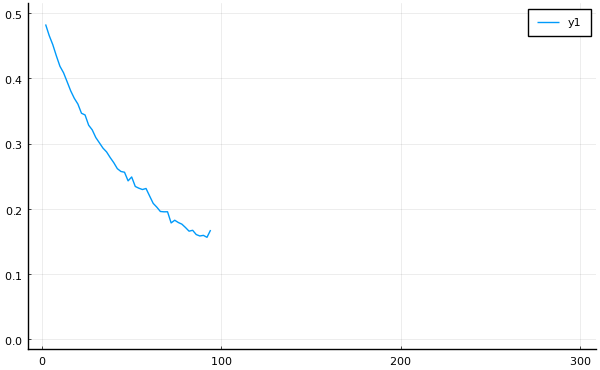

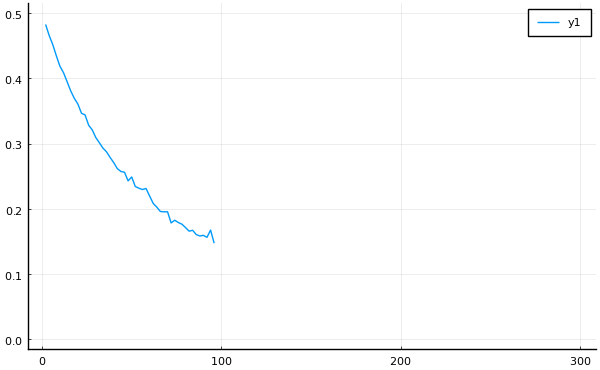

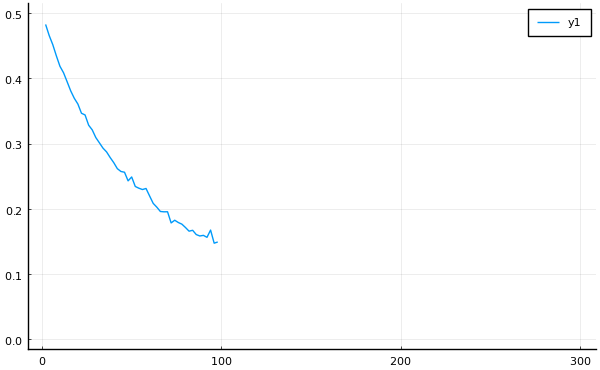

Machine{ProbabilisticIteratedModel{EvoTreeClassifier{Float32,…}},…} @469 trained 1 time; does not cache data
  args: 
    1:	Source @515 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @672 ⏎ `AbstractArray{Multiclass{2},1}`


In [2]:
EvoTreeClassifier = @load EvoTreeClassifier verbosity=0

model = EvoTreeClassifier(rng=123, η=0.005)

iterations = Int[0]
losses = Float64[0]

function update_plot(loss)
    push!(losses, loss)
    plot(iterations[2:end],
         losses[2:end],
         xlim=[1,300],
         ylim=[0,0.5]) |> display
end

imodel = IteratedModel(model=model,
                       resampling=Holdout(rng=123),
                       measures=[brier_loss, log_loss],
                       iteration_parameter=:nrounds,
                       controls=[Step(2),
                                 WithIterationsDo(i->push!(iterations, i)),
                                 WithLossDo(update_plot),
                                 GL(200),
                                 TimeLimit(Second(30))])

mach = machine(imodel, X, y) |> fit!

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*